# Task 1
## Part 1

In [11]:
import csv
import math
import numpy as np

# Open and parse the csv files- we will be using simple python lists to store the MNIST data
trainInFile = open("train_in.csv") 
trainOutFile = open("train_out.csv")
train_in_reader = csv.reader(trainInFile)
train_out_reader = csv.reader(trainOutFile)

# 'ins' contains the all the image vectors and outs contains the corresponding digit labels
ins = [[float(i) for i in line] for line in train_in_reader]
outs = [int(i[0]) for i in train_out_reader]

# Initialise dictionary which will contain all the centers (means)
centers = {"0": [], "1": [], "2": [], "3": [], "4": [], "5": [], "6": [], "7": [], "8": [], "9": []}

# Calculating the center for each digit
indexNumber = 0
for numVector in ins:
    correspondingNumber = outs[indexNumber]
    if len(centers[str(correspondingNumber)]) == 0:
        centers[str(correspondingNumber)] = numVector
    else:
        for j in range(256):
            centers[str(correspondingNumber)][j] = centers[str(correspondingNumber)][j] + numVector[j]
    indexNumber += 1

for key in centers.keys():
    length = len(centers[key])
    centers[key] = [i/length for i in centers[key]]

# Distance matrix initialization
dist = [[0 for j in range(10)] for i in range(10)]

# Calculating the Euclidean distance between all the centers
for i in range(10):
    for j in range(10):
        squared = [(centers[str(i)][k] - centers[str(j)][k])**2 for k in range(256)]
        distance = round(math.sqrt(sum(squared)), 3)
        dist[i][j] = distance

for row in dist:
    print(" ".join(f"{round(item, 3):>7}" for item in row))

# The output printed below is the distance matrix

    0.0  15.294  10.537  10.146  11.116  10.502   9.101  11.476   10.52  11.085
 15.294     0.0  10.345   11.89    11.3   12.54  10.922  10.595   10.86  10.688
 10.537  10.345     0.0    5.51   5.341   5.893   4.927   6.058   4.852   5.587
 10.146   11.89    5.51     0.0   4.501   3.355    5.23   5.617   3.809   4.298
 11.116    11.3   5.341   4.501     0.0   3.704   4.885   4.982    3.93   3.101
 10.502   12.54   5.893   3.355   3.704     0.0   4.454   6.231   4.105   4.419
  9.101  10.922   4.927    5.23   4.885   4.454     0.0   6.828   4.973    5.76
 11.476  10.595   6.058   5.617   4.982   6.231   6.828     0.0    5.37   3.574
  10.52   10.86   4.852   3.809    3.93   4.105   4.973    5.37     0.0   3.385
 11.085  10.688   5.587   4.298   3.101   4.419    5.76   3.574   3.385     0.0


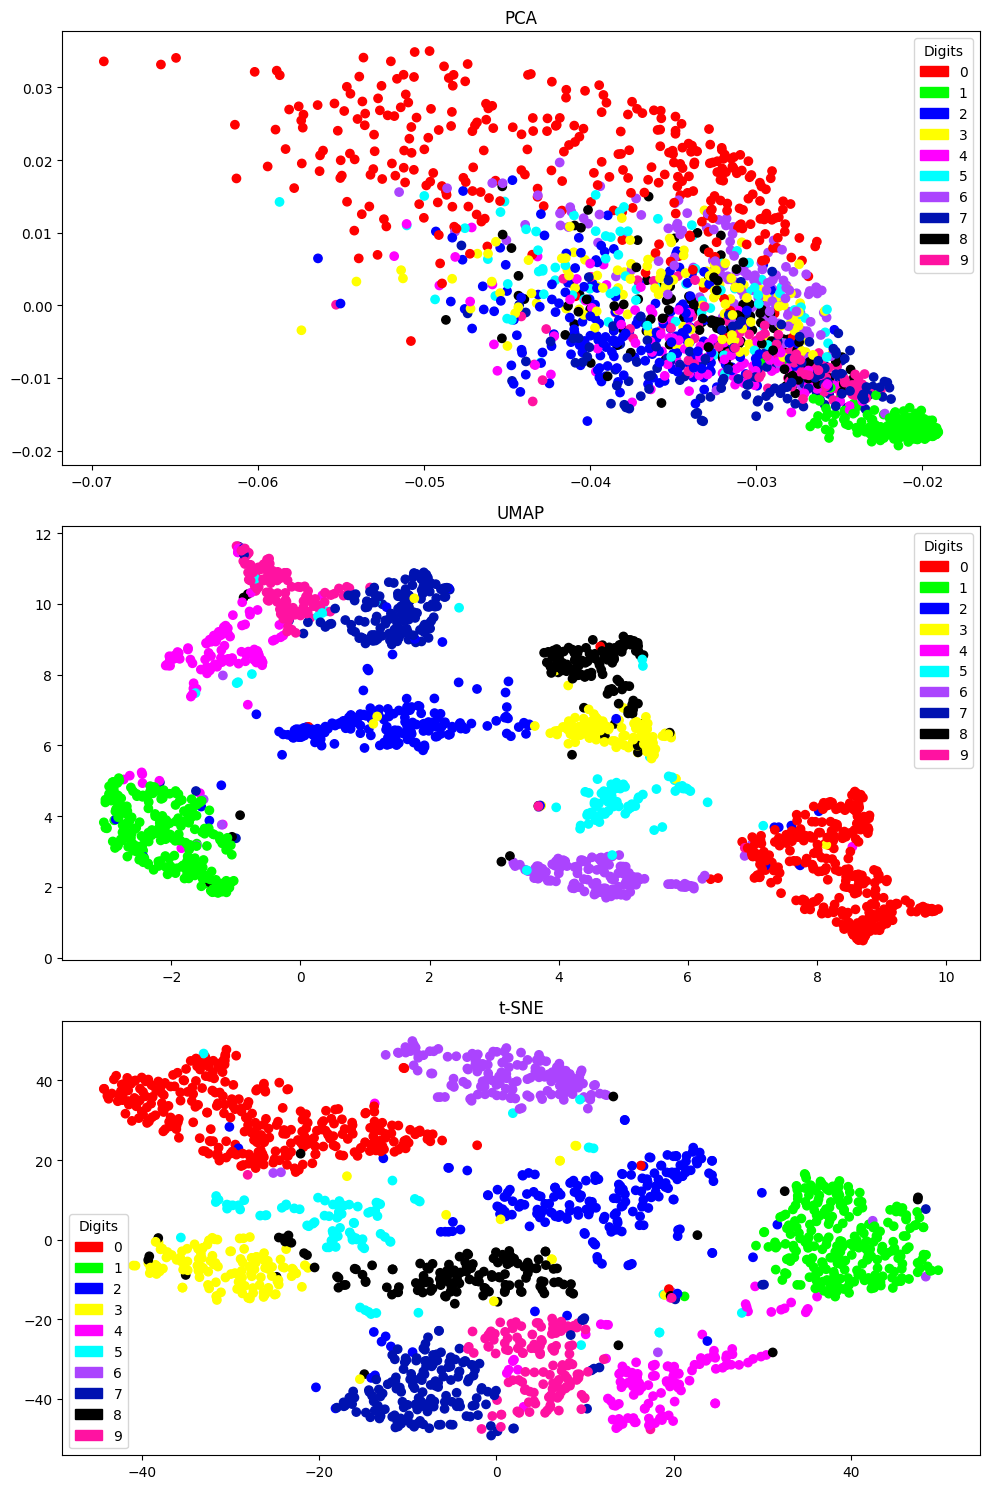

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import umap
from sklearn.manifold import TSNE

colorsIndex = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF", "#ab44fe", "#0012b1", "#000000", "#ff12a1"]
colors = [colorsIndex[i] for i in outs]

# Normalizing data using Min-Max Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(ins)

# PCA
pca = PCA(n_components=2)
Y = pca.fit_transform(X)

# UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X)


'''
Filter PCA results
    I am doing this because originally, there were some outliers in the PCA plot where the values were beyond the normal range, thus resulting in a squished plot where you couldn't really see anything.
'''
mask = (Y[:, 0] <= 1) & (Y[:, 1] <= 1)
Y_filtered = Y[mask]
colors_filtered = np.array(colors)[mask]
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot PCA results
axs[0].scatter(Y_filtered[:, 0], Y_filtered[:, 1], c=colors_filtered)
labels = list(set(outs))
handles = [mpatches.Patch(color=colorsIndex[label], label=str(label)) for label in labels]
axs[0].legend(handles=handles, title="Digits")
axs[0].set_title('PCA')

# Plot UMAP results
axs[1].scatter(embedding[:, 0], embedding[:, 1], c=colors)
axs[1].legend(handles=handles, title="Digits")
axs[1].set_title('UMAP')

# Plot t-SNE results
axs[2].scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors)
axs[2].legend(handles=handles, title="Digits")
axs[2].set_title('t-SNE')

# Show the plots
plt.tight_layout()
plt.show()